## 教师信息
    姓名: 董兆宇
    电话/微信: 13426253019 
    邮箱: dongzhaoyu@k2data.com.cn

# Pandas 课程 (3) —— 课程概要：
    1. DataFrame object介绍
    2. DataFrame datetime介绍
    3. DataFrame 长宽转换
    4. DataFrame 的滚动函数
    5. DataFrame 的数据可视化简介

## 1. DataFrame object介绍

In [102]:
import pandas as pd
import numpy as np
df = pd.DataFrame(list(zip(['AbA','bSx','Cxx','zbc'],[1,2,3,4])),columns = ['A','B'])
df

,A,B
0,AbA,1
1,bSx,2
2,Cxx,3
3,zbc,4


In [2]:
## DF 中的 object 类型是 字符串类型的 Series
df.dtypes

A    object
B     int64
dtype: object

In [5]:
## df的 A列的每个值 进行首字母大写
df.A.map(lambda x:x.capitalize()) ## str类型有capitalize方法, 所以可以对df.A 进行map操作, 然后对其中每个元素进行 首字母大写操作

0    Aba
1    Bsx
2    Cxx
3    Zbc
Name: A, dtype: object

In [13]:
df.A.str.capitalize() ## object 类型的Series 可以使用 .str. 的所有方法 进行向量操作 , 较比map方式要快的多

0    Aba
1    Bsx
2    Cxx
3    Zbc
Name: A, dtype: object

In [12]:
# df.A.str.upper()  ## df.A 的元素全部大写
df.A.str.lower()  ## df.A 的元素全部小写
## python str 类型 的方法 在 object 类型的Series.str. 基本都可以使用

0    aba
1    bsx
2    cxx
3    zbc
Name: A, dtype: object

In [11]:
df.A.str.repeat(2) ## 重复 df.A 的元素 N 遍

0    AbAAbA
1    bSxbSx
2    CxxCxx
3    zbczbc
Name: A, dtype: object

In [ ]:
df.A.str[1:3] ## df.A 字符串切片

In [ ]:
df.A.str.split('x') ## Series.str.split 可以对每个元素进行字符串分割, 但是返回的是 每个元素为 list 的 Series

In [19]:
df.A.str.join('-') ## 用连接符 将 每个字符进行字符串连接

0    A-b-A
1    b-S-x
2    C-x-x
3    z-b-c
Name: A, dtype: object

In [ ]:
df.A.str.find('b') ## 返回子字符串所在索引

In [17]:
df1 = pd.Series(['a1b','c1d','e1f'])
df1

0    a1b
1    c1d
2    e1f
dtype: object

In [16]:
pd.DataFrame(df1.str.split('1').tolist())

,0,1
0,a,b
1,c,d
2,e,f


#### 课上练习题：
将df的 ITEMNAME 分解成两列 
1. 一列是腔室名称 "_" 之前的为腔室名称 , 腔室名称列所有元素都小写
2. "_" 之后的赋值给参数名称列, 参数名称列所有元素 只有首字母大写,其余小写

In [67]:
df = pd.DataFrame([['PC1_TEMP',23],['PC2_TEMP',24],['MC1_RATE',10],\
            ['MC2_RATE',15],['PC3_RATE',10]],columns = ['ITEMNAME','SITEVALUE'])
df

,ITEMNAME,SITEVALUE
0,PC1_TEMP,23
1,PC2_TEMP,24
2,MC1_RATE,10
3,MC2_RATE,15
4,PC3_RATE,10


In [81]:
df1 = pd.DataFrame(df.ITEMNAME.str.split('_').tolist(),columns=['PC_NAME','PARA'])
df1.PC_NAME = df1.PC_NAME.str.lower() + '_' + df1.PARA
df1.PARA = df1.PARA.str.capitalize()
df1

,PC_NAME,PARA
0,pc1_TEMP,Temp
1,pc2_TEMP,Temp
2,mc1_RATE,Rate
3,mc2_RATE,Rate
4,pc3_RATE,Rate


## 2. DataFrame datetime介绍

### 2.1 生成时间序列

In [50]:
t = pd.date_range('2018-01-01','2018-01-10') ## pd.date_range 可以生成时间序列, 返回的是DatetimeIndex 类型, 默认间隔按照为 日 单位
t

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
s = pd.Series(pd.date_range('2018-01-01','2018-01-10',freq='3S')) ## freq 可以控制时间序列间隔
## {S/s: second , M/m: month , D/d : day ,Y/y: year , W/w :week}
s.head()

In [ ]:
s = pd.Series(pd.date_range('2018-01-01',freq='3S',periods=100)) ## periods 可以控制生成序列的长度
s = pd.Series(pd.date_range(end='2018-01-01',freq='3S',periods=100)) ## 若指定的是end , 则向前生成时间序列
## {S/s: second , M/m: month , D/d : day ,Y/y: year , W/w :week T/t : minute}
s.head()

In [ ]:
df = pd.DataFrame(zip(['2018-01-02','2018-02-03','2018-03-04'],['2018-02-02','2018-03-03','2018-04-04']),columns = ['A','B'])
print (df.A.dtype) ## object 型 Series
df.A = pd.to_datetime(df.A) ## 可以通过pd.to_datetime 将时间戳字符串转换成 时间序列
print (df.A.dtype)
df = df.astype(np.datetime64)  ## 也可以通过astype 将时间戳字符串转换成 时间序列 , 区别是astype 可以一次性转换多列
print (df.B.dtype)

In [56]:
## 返回格式化日期(object 类型的Series ) %Y: 代表4位的年 ,%m: 代表2位的月 ,%d: 代表2位的日 
## %H: 代表2位的时 ,%M: 代表2位的分 ,%S: 代表2位的秒 
s = pd.Series(['2018/01/02','2018/02/03','2018/03/04'])

pd.to_datetime(s,format='%Y/%m/%d') ## pd.to_datetime 可以 指定format(时间戳格式化字符串) 转换时间序列
## pd.to_datetime 其实可以根据字符串格式自调节format, 但若指定format 进行 转换, 转换速度和效率会大大提升

0   2018-01-02
1   2018-02-03
2   2018-03-04
dtype: datetime64[ns]

### 2.2  时间序列的方法介绍

In [83]:
s = pd.Series(pd.date_range('2018-12-29',freq='1D',periods=4)) 
s1 = pd.Series(pd.date_range('2018-12-21',freq='10S',periods=4)) 
df = pd.DataFrame(list(zip(s,s1)),columns = ['A','B'])
df

,A,B
0,2018-12-29,2018-12-21 00:00:00
1,2018-12-30,2018-12-21 00:00:10
2,2018-12-31,2018-12-21 00:00:20
3,2019-01-01,2018-12-21 00:00:30


In [84]:
## DF 中的 datetime64[ns] 类型是 时间序列的 Series
df.dtypes

A    datetime64[ns]
B    datetime64[ns]
dtype: object

In [ ]:
## datetime64[ns]类型的Series 可以使用 .dt. 的所有方法 进行向量操作 
df.A.dt.year  ## 获取 当前时间序列的 年 返回的是 int 类型的 Series
## 另外还有month, day , hour, minute ,second  这些都是属性, 即不需要(), 直接返回 int型 Series

In [ ]:
df.A.dt.date  ## 获取 当前时间序列的 日期 返回的是 object 类型的 Series

In [89]:
# df.A.dt.dayofweek ## 属性 , 可以返回该日期 是星期几. (位置, 0代表星期一, 6代表 星期日)
# df.A.dt.day_name()  ## 方法 , 可以返回该日期的 星期几.( 英文)
df.A.dt.weekday_name

0    Saturday
1      Sunday
2      Monday
3     Tuesday
Name: A, dtype: object

In [ ]:
df.A.dt.dayofyear ## 属性 返回一年中 的第几天, 从1开始计数

In [ ]:
df.A.dt.week ## 属性 返回一年中 的第几周, 从1开始计数

In [90]:
df.A.dt.strftime("%Y/%m/%d %H-%M-%S") ## 指定时间格式化字符串 进行 转换

0    2018/12/29 00-00-00
1    2018/12/30 00-00-00
2    2018/12/31 00-00-00
3    2019/01/01 00-00-00
Name: A, dtype: object

In [ ]:
## df.A.dt. 针对 时间序列 还有很多 方法, 可以根据实际情况使用

### 2.3 时间序列的向量运算

In [193]:
s = pd.Series(pd.date_range('2018-12-28',freq='2S',periods=5)) 
s1 = pd.Series(pd.date_range('2019-01-01',freq='10S',periods=5)) 
df = pd.DataFrame(list(zip(s,s1)),columns = ['start','end'])
df
df.dtypes

start    datetime64[ns]
end      datetime64[ns]
dtype: object

In [92]:
t = df['end'] - df['start']  ## 时间序列可以做 向量运算 , 如两个时间向量的差
print (t.dtype)   ## 时间序列的差 在DF中的  dtype 为  timedelta64[ns]
t

timedelta64[ns]


0   4 days 00:00:00
1   4 days 00:00:08
2   4 days 00:00:16
3   4 days 00:00:24
4   4 days 00:00:32
dtype: timedelta64[ns]

In [ ]:
df['end']+t ## 时间序列的加法运算中 需要有 timedelta64 类型 

In [93]:
t.dt.freq ## 时间差 序列的 间隔频率

'8S'

In [ ]:
t.dt.seconds ## 返回的时间差中 的秒数位置 值

In [94]:
t.dt.total_seconds() ## 方法, 返回的是 时间差中的 实际相差秒数 

0    345600.0
1    345608.0
2    345616.0
3    345624.0
4    345632.0
dtype: float64

### 2.4 时间序列的重采样

In [95]:
s = pd.Series(pd.date_range('2018-12-28',freq='2S',periods=10)) 
df = pd.Series(range(len(s)),index=s)
df

2018-12-28 00:00:00    0
2018-12-28 00:00:02    1
2018-12-28 00:00:04    2
2018-12-28 00:00:06    3
2018-12-28 00:00:08    4
2018-12-28 00:00:10    5
2018-12-28 00:00:12    6
2018-12-28 00:00:14    7
2018-12-28 00:00:16    8
2018-12-28 00:00:18    9
dtype: int64

In [96]:
df.resample('1S').pad() ## df.resample 是 对于时间序列的重采样操作
## resample 后面接执行函数 , 可以使用内置函数 .sum() .pad() .bfill() 等等  .apply() 可以接自定义函数

2018-12-28 00:00:00    0
2018-12-28 00:00:01    0
2018-12-28 00:00:02    1
2018-12-28 00:00:03    1
2018-12-28 00:00:04    2
2018-12-28 00:00:05    2
2018-12-28 00:00:06    3
2018-12-28 00:00:07    3
2018-12-28 00:00:08    4
2018-12-28 00:00:09    4
2018-12-28 00:00:10    5
2018-12-28 00:00:11    5
2018-12-28 00:00:12    6
2018-12-28 00:00:13    6
2018-12-28 00:00:14    7
2018-12-28 00:00:15    7
2018-12-28 00:00:16    8
2018-12-28 00:00:17    8
2018-12-28 00:00:18    9
Freq: S, dtype: int64

In [97]:
df.resample('4S').mean() ## df.resample 第一个参数 是 rule , 即重采样的规则

2018-12-28 00:00:00    0.5
2018-12-28 00:00:04    2.5
2018-12-28 00:00:08    4.5
2018-12-28 00:00:12    6.5
2018-12-28 00:00:16    8.5
Freq: 4S, dtype: float64

In [ ]:
df.resample('3S').interpolate() ## 当resample 出现空值时 可以使用 .interpolate() 方法进行性形插值操作

In [ ]:
df = pd.DataFrame(data=9*[range(4)], columns=['a', 'b', 'c', 'd'])
df['time'] = pd.date_range('1/1/2000', periods=9, freq='T')
df

In [ ]:
df.resample('4T', on='time').sum() ## 若时间列不是索引的话, 可以使用on 指定 时间序列

#### 课上练习题：
1. 计算每个SHEETID 在每一个机台 的加工时间
2. 计算每个SHEETID 在每个机台进入下一个机台的等待时间

In [103]:
df = pd.DataFrame([['s1','2AFE01','2018-11-01 00:00:10'],['s2','2AFE01','2018-11-01 00:00:18'],['s1','2AFE02','2018-11-01 00:20:15'],\
     ['s1','2AFE01','2018-11-01 00:10:13'],['s3','2AFE03','2018-11-01 00:10:48'],['s2','2AFE01','2018-11-01 00:10:06'],\
     ['s3','2AFE04','2018-11-01 00:40:12'],['s1','2AFE02','2018-11-01 00:30:55'],['s2','2AFE02','2018-11-01 00:20:59'],\
     ['s2','2AFE02','2018-11-01 00:30:31'],['s3','2AFE03','2018-11-01 00:20:21'],['s3','2AFE04','2018-11-01 00:30:41']],\
        columns = ['SHEETID','MACHINENAME','EVENTTIME'])
df

,SHEETID,MACHINENAME,EVENTTIME
0,s1,2AFE01,2018-11-01 00:00:10
1,s2,2AFE01,2018-11-01 00:00:18
2,s1,2AFE02,2018-11-01 00:20:15
3,s1,2AFE01,2018-11-01 00:10:13
4,s3,2AFE03,2018-11-01 00:10:48
5,s2,2AFE01,2018-11-01 00:10:06
6,s3,2AFE04,2018-11-01 00:40:12
7,s1,2AFE02,2018-11-01 00:30:55
8,s2,2AFE02,2018-11-01 00:20:59
9,s2,2AFE02,2018-11-01 00:30:31


In [124]:
df2 = df.sort_values(by= ['SHEETID', 'MACHINENAME'])
df2

,SHEETID,MACHINENAME,EVENTTIME
0,s1,2AFE01,2018-11-01 00:00:10
3,s1,2AFE01,2018-11-01 00:10:13
2,s1,2AFE02,2018-11-01 00:20:15
7,s1,2AFE02,2018-11-01 00:30:55
1,s2,2AFE01,2018-11-01 00:00:18
5,s2,2AFE01,2018-11-01 00:10:06
8,s2,2AFE02,2018-11-01 00:20:59
9,s2,2AFE02,2018-11-01 00:30:31
4,s3,2AFE03,2018-11-01 00:10:48
10,s3,2AFE03,2018-11-01 00:20:21


In [201]:
s = df2.EVENTTIME
l1 = []
for i in range(0, 11, 2):
    l1.append(s.iloc[i])
l2 = []
for i in range(1, 12, 2):
    l2.append(s.iloc[i])
df1 = pd.DataFrame(list(zip(l1, l2)),columns = ['start','end'])
df1 = df1.astype('datetime64')

In [204]:
t1 = df1['end'] - df1['start']
t1

0            00:10:03
1            00:10:40
2            00:09:48
3            00:09:32
4            00:09:33
5   -1 days +23:50:29
dtype: timedelta64[ns]

## 3. DataFrame 长宽转换
DataFrame的 长转宽 和 宽转长 有多种方式可以实现 

### 3.1 stack 和  unstack

In [175]:
df = pd.DataFrame({'one':[1,2,3],'two':[2,2,4],'three':[4,2,3]} )
df

,one,two,three
0,1,2,4
1,2,2,2
2,3,4,3


In [176]:
## stack 可以将所有的columns 压缩成列m, 等效于宽表转长表
df1 = df.stack()
df1

0  one      1
   two      2
   three    4
1  one      2
   two      2
   three    2
2  one      3
   two      4
   three    3
dtype: int64

In [177]:
df1.unstack() ## unstack 可以将最外层索引 扩展会列, 等效于长表转宽表

,one,two,three
0,1,2,4
1,2,2,2
2,3,4,3


## stack 和  unstack 用法总结
1. stack 和 unstack 相互对应
2. stack 将 columns 压缩回  index
3. unstack 是 将index 扩展成 columns

### 3.2 pd.melt
pd.melt (df.melt) 是可以用作 宽转长的方法

In [182]:
df = pd.DataFrame({'col1': list('aaabb'), 'col2': [2]*5,'col3':list('cccdd')})
df

,col1,col2,col3
0,a,2,c
1,a,2,c
2,a,2,c
3,b,2,d
4,b,2,d


In [183]:
# id_vars:不需要被转换的列名。
# value_vars:需要转换的列名，如果剩下的列全部都要转换，就不用写了。
df.melt(id_vars=['col1'],value_vars = ['col2','col3']) 
# pd.melt(df,id_vars=['col1'],value_vars = ['col2','col3']) ## 等效于 pd.melt用法, pandas中有些方法pd有, df也有, 就是省略了 frame这个参数

,col1,variable,value
0,a,col2,2
1,a,col2,2
2,a,col2,2
3,b,col2,2
4,b,col2,2
5,a,col3,c
6,a,col3,c
7,a,col3,c
8,b,col3,d
9,b,col3,d


In [ ]:
# var_name和value_name是自定义设置对应的列名
pd.melt(df,id_vars=['col2'],value_vars=['col1'],var_name='hi',value_name='hello')

### 3.3 pd.pvioid_table
pd.pvioid_table (df.pvioid_table) 是可以用作 长转宽的方法

In [184]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                          "bar", "bar", "bar", "bar"],
                    "B": ["one", "one", "one", "two", "two",
                          "one", "one", "two", "two"],
                    "C": ["small", "large", "large", "small",
                          "small", "large", "small", "small",
                          "large"],
                    "D": [1, 2, 2, 3, 3, 4, 5, 6, 7]})
df

,A,B,C,D
0,foo,one,small,1
1,foo,one,large,2
2,foo,one,large,2
3,foo,two,small,3
4,foo,two,small,3
5,bar,one,large,4
6,bar,one,small,5
7,bar,two,small,6
8,bar,two,large,7


In [188]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns='C', fill_value=0)
## index ,columns 和 values 都可以选取多列 , aggfunc 可以使用自定义函数 , 默认是均值计算 
## fill_value, 若index和columns 组合的value 为空, 可以使用fill_value 进行空值替换

C        large  small
A   B                
bar one      4      5
    two      7      6
foo one      2      1
    two      0      3

In [187]:
pd.pivot_table(df, values='C', index='A', columns='B',aggfunc=lambda x:list(x)) ## C列的value是字符串, 不能使用默认的mean

B,one,two
A,,
bar,"[large, small]","[small, large]"
foo,"[small, large, large]","[small, small]"


### pvioid_table的用法总结
数据透视表 ，常用于长表转宽表 , 重点关注四个参数 index, columns , values 和 aggfunc
1. index 是处理成宽表下的 行字段 ,取值 可以是 一个字段名，也可以是一组字段名
2. columns 是处理成宽表下的 列字段 ,取值 可以是 一个字段名，也可以是一组字段名
3. values 是处理成宽表下的 值字段 ,取值 可以是 一个字段名，也可以是一组字段名
4. aggfunc 是处理成宽表下的 针对值字段的处理方法, 可以是内置函数 'last','first','mean','sum','count' , 也可以使用自定义函数

## 4. DataFrame 的滚动函数
DataFrame 中有些计算是相邻元素之间的计算 , 需要一些滚动函数来完成

### 4.1 rolling 用法
移动窗口rolling的概念

In [206]:
df = pd.DataFrame(np.random.rand(5,5),columns = ['A','B','C','D','E'])
df

,A,B,C,D,E
0,0.703762,0.337745,0.768260,0.620125,0.057514
1,0.408241,0.878075,0.270844,0.954091,0.757451
2,0.568763,0.000545,0.507906,0.334320,0.803356
3,0.291805,0.099961,0.551398,0.217401,0.857835
4,0.538924,0.382185,0.341428,0.297784,0.338295


In [154]:
df.A.rolling(window=3).mean() ## rolling 是滚动窗口计算的函数, rolling的重要参数window 即滚动窗口长度

0         NaN
1         NaN
2    0.410741
3    0.572544
4    0.593341
Name: A, dtype: float64

In [ ]:
df.A.rolling(window=3).apply(min) ## 后面需要接执行函数, 可以是内置函数, 也可以接apply 自定义函数

In [207]:
df.rolling(3,axis=1).mean() ## rolling可以对DF使用, axis 可以控制滚动方向

,A,B,C,D,E
0,NaN,NaN,0.603256,0.575377,0.481966
1,NaN,NaN,0.519054,0.701004,0.660796
2,NaN,NaN,0.359072,0.280924,0.548527
3,NaN,NaN,0.314388,0.289587,0.542211
4,NaN,NaN,0.420846,0.340466,0.325836


### df.rolling  参数详解
1. window： 也可以省略不写。表示时间窗的大小，注意有两种形式（int or offset）。如果使用int，则数值表示计算统计量的观测值的数量即向前几个数据。如果是offset类型，表示时间窗的大小。offset详解 
2. min_periods：每个窗口最少包含的观测值数量，小于这个值的窗口结果为NA。值可以是int，默认None。offset情况下，默认为1。 
3. center: 把窗口的标签设置为居中。布尔型，默认False，居右 
4. win_type: 窗口的类型。截取窗的各种函数。字符串类型，默认为None。各种类型 
5. on: 可选参数。对于dataframe而言，指定要计算滚动窗口的列。值为列名。 
6. axis: int、字符串，默认为0，即对列进行计算 
7. closed：定义区间的开闭，支持int类型的window。对于offset类型默认是左开右闭的即默认为right。可以根据情况指定为left both等。

### 4.2 diff用法

In [155]:
df = pd.DataFrame(list(zip([1,6,4,28,7],[8,4,1,2,3])),columns = ['A','B'])
df

,A,B
0,1,8
1,6,4
2,4,1
3,28,2
4,7,3


In [ ]:
df.A.diff() ## diff 可以用作 相邻元素相减 , 默认是后 减 前

In [156]:
df.A.diff(2) ## diff 中默认第一个参数为 periods, 即 间隔长度, 默认为1

0     NaN
1     NaN
2     3.0
3    22.0
4     3.0
Name: A, dtype: float64

In [158]:
df.B.diff(-2) ## 若periods 为赋值, 可以控制方向为 前减后

0    7.0
1    2.0
2   -2.0
3    NaN
4    NaN
Name: B, dtype: float64

In [160]:
df.diff(axis=1)  ## diff 可以应用于DF, axis 控制 函数的作用方向

,A,B
0,NaN,7.0
1,NaN,-2.0
2,NaN,-3.0
3,NaN,-26.0
4,NaN,-4.0


### 4.3 累积函数用法

In [159]:
df = pd.DataFrame(list(zip([1,6,4,28,7],[8,4,1,2,3])),columns = ['A','B'])
df

,A,B
0,1,8
1,6,4
2,4,1
3,28,2
4,7,3


In [161]:
df.cumsum() ## 滚动相加函数, 这些函数都存在axis , 以下不再赘述

,A,B
0,1,8
1,7,12
2,11,13
3,39,15
4,46,18


In [ ]:
df.cummax() ## 滚动比较最大值

In [ ]:
df.cummin() ## 滚动比较最小值 

In [ ]:
df.cumprod() ## 滚动相乘函数

#### 课上练习题：
df的 ITEMNAME :  _ 前后分别是腔室名称和制程参数名称 
1. 将df 进行结构转换, 以SHEETID为主键, 整理出每个SHEETID 经过的 腔室名称(新列为 SUB) 和所有制程参数的 sitevalue值
2. 即转换后的数据columns 为 SHEETID, SUB, TEMP, TEMP1, RATE, RATE1 ,转换后数据每个制程参数列的值为 其sitevalue值

In [231]:
df = pd.DataFrame([['s1', 'PC1_TEMP', 10.0],['s1', 'PC1_RATE', 2.7],['s2', 'PC2_TEMP', 13.0],['s2', 'PC2_TEMP1', 10.0],\
                   ['s2', 'PC2_RATE', 2.0],['s2', 'PC2_RATE1', 2.3],['s3', 'PC1_TEMP1', 13.0],['s4', 'PC3_TEMP', 12.0],\
                   ['s4', 'PC3_RATE1', 3.8],['s5', 'PC2_RATE', 3.0]],columns = ['SHEETID','ITEMNAME','SITEVALUE'])
df

,SHEETID,ITEMNAME,SITEVALUE
0,s1,PC1_TEMP,10.0
1,s1,PC1_RATE,2.7
2,s2,PC2_TEMP,13.0
3,s2,PC2_TEMP1,10.0
4,s2,PC2_RATE,2.0
5,s2,PC2_RATE1,2.3
6,s3,PC1_TEMP1,13.0
7,s4,PC3_TEMP,12.0
8,s4,PC3_RATE1,3.8
9,s5,PC2_RATE,3.0


In [230]:
df['SUB']=df.ITEMNAME.apply(lambda x:pd.Series(x.split("_")))[0]
df['Para']=df.ITEMNAME.apply(lambda x:pd.Series(x.split("_")))[1]
# res=pd.pivot_table(df, values='SITEVALUE', index='SHEETID', columns=['Para'],aggfunc=lambda x:x)
# res1=df[['SHEETID','SUB']].drop_duplicates()
# pd.merge(res1,res,on='SHEETID')
df

,SHEETID,ITEMNAME,SITEVALUE,SUB,Para
0,s1,PC1_TEMP,10.0,PC1,TEMP
1,s1,PC1_RATE,2.7,PC1,RATE
2,s2,PC2_TEMP,13.0,PC2,TEMP
3,s2,PC2_TEMP1,10.0,PC2,TEMP1
4,s2,PC2_RATE,2.0,PC2,RATE
5,s2,PC2_RATE1,2.3,PC2,RATE1
6,s3,PC1_TEMP1,13.0,PC1,TEMP1
7,s4,PC3_TEMP,12.0,PC3,TEMP
8,s4,PC3_RATE1,3.8,PC3,RATE1
9,s5,PC2_RATE,3.0,PC2,RATE


In [232]:
df = pd.DataFrame(df.ITEMNAME.str.split('_').tolist(),columns=['SUB', 'Para'])
res = pd.pivot_table(df, values = 'SITEVALUE', index = 'SHEETID', columns = ['Para'])
res1 = df[['SHEETID', 'SUB']].drop_duplicates()
pd.merge(res, res1, on = 'SHEETID')


KeyError: 'SITEVALUE'

In [190]:
## 示范数据结构:
pd.DataFrame([['s1','PC1',10.0,np.nan,2.7,np.nan]],columns = ['SHEETID','SUB','TEMP','TEMP1','RATE','RATE1'])

,SHEETID,SUB,TEMP,TEMP1,RATE,RATE1
0,s1,PC1,10.0,NaN,2.7,NaN


## 5. DataFrame 的数据可视化简介

In [162]:
df = pd.DataFrame(list(zip([1,6,4,28,7],[8,4,1,2,3])),columns = ['A','B'])
df

,A,B
0,1,8
1,6,4
2,4,1
3,28,2
4,7,3


In [164]:
import matplotlib.pyplot as plt   ## 需要加载plt ,才能调用python画布, 显示图片
## import pylab as pl

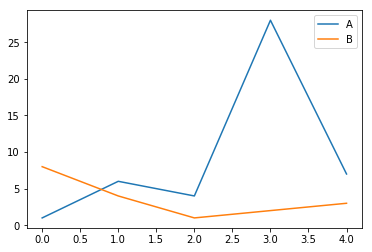

In [165]:
df.plot()  ## DataFrame 自带了plot 功能

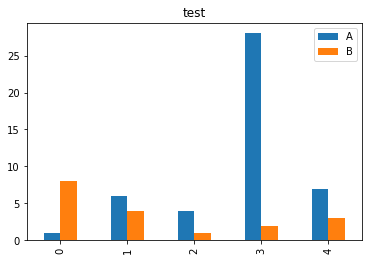

In [166]:
df.plot(kind='bar',title = 'test') ## 其参数可以控制绘制类型, 图片题目等等, 后续有详细的课程交大家如何利用python进行数据可视化